<a href="https://colab.research.google.com/github/sidhuak1/Repository-1/blob/main/Lending.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##LENDING CLUB BACKGROUND
Lending Club is a peer-to-peer (P2P) lending platform, where borrowers submit their loan applications and individual lenders select the applications that they want to fund. Borrowers receive the full amount of the issued loan minus the origination fee, which is paid to the company. Investors purchase notes backed by the personal loans and pay Lending Club a service fee.

P2P lending brings down the cost of personal loans compared to traditional financing by connecting the borrowers and investors directly. However, there is always a risk of investing in a bad loan. In fact, the default rate for P2P loans are much higher than that of traditional loans. Therefore, the lending industry is highly interested in providing the investors with comprehensive risk assessment of the loan applications. The company shares data about all loan applications made through its platform. 

**DATA SETUP**

This code uses loans from the period of October 2007 to September 2017 that were Paid in Full or Defaulted.This code uses logistic regression and decision trees to to develop a predictive model.

The dataset has already been split into train and test set. There are 6,970 instances of training set and 4,644 instances of test set with with four features and one target. The four features are home_ownership, income, dti, fico_low, delinquit in 2 years and credit balance excluded mortgage; and the target is loan status that includes either fully paid or defaulted loans only. 

In [ ]:
# import packages
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_recall_curve, roc_curve, auc, average_precision_score

from sklearn.tree import DecisionTreeClassifier as dt

In [ ]:
train = pd.read_excel('data_training.xlsx')
test = pd.read_excel('data_test.xlsx')
# 1 = good, 0 = default

# give column names
cols = ['home_ownership', 'income', 'dti', 'delinq', 'fico_low', 'cred_bal','loan_status']
train.columns = test.columns = cols

print(train.head())
print("--------------------------------")
print(test.head())

# remove target column to create feature only dataset
X_train = train.drop('loan_status', 1)
X_test = test.drop('loan_status', 1)

# store target column
y_train = train['loan_status']
y_test = test['loan_status']

print("--------------------------------")
print('Traning set is',X_train.shape, y_train.shape, 'Test set is',X_test.shape, y_test.shape)
X_train.columns

   home_ownership   income    dti  delinq  fico_low    cred_bal  loan_status
0               1   44.304  18.47       0        70   49.784544            0
1               0   50.000  29.62       0       115   74.939000            1
2               0   64.400  16.68       3        55   16.824000            1
3               0   38.500  33.73       0        40   46.857000            0
4               1  118.000  26.66       0        45  116.751000            1
--------------------------------
   home_ownership  income    dti  delinq  fico_low  cred_bal  loan_status
0               0   48.16  22.08       0        75    32.475            0
1               1   56.00  26.51       0        40   242.243            1
2               0   36.00  22.13       0        55    40.411            1
3               1   60.00  12.76       0        45    32.038            1
4               1   90.00  11.85       0       140    67.202            1
--------------------------------
Traning set is (6970, 6) (69

Index(['home_ownership', 'income', 'dti', 'delinq', 'fico_low', 'cred_bal'], dtype='object')

##Naive Model
Predict loans are fully paid, based on the frequency of fully paid loans. Accuracy score is 0.788

In [ ]:
# count frequency of different classes in loan status
freq = y_train.value_counts()
print('Frequency for paid and defaulted loans is')
print(freq/sum(freq)*100)

# predict fully paid only
majority_class = y_train.mode()[0]
prediction = np.full(shape=y_train.shape, fill_value=majority_class)
print('Accuracy of simple prediction is',accuracy_score(y_train, prediction))

Frequency for paid and defaulted loans is
1    78.823529
0    21.176471
Name: loan_status, dtype: float64
Accuracy of simple prediction is 0.788235294117647


##Logistic Regression
The bias is estimated as 0.98. The coefficient of the logistic regression are 0.300091 for home_ownership, -0.00020 for income, -0.03845 for dti, -0.0192 for Delinquint loans, 0.01211 for fico_low and 0.00125 for credit balance. 

In [ ]:
# create an instance of logistic regression
lgstc_reg =  LogisticRegression(penalty="none", solver='newton-cg')

# fit training data on logistic regression 
lgstc_reg.fit(X_train, y_train)

# get the coefficients of each features
print('Logistic regression coefficients are',lgstc_reg.intercept_, lgstc_reg.coef_)

# predict default loans based on test data set
y_pred = lgstc_reg.predict(X_test)                           

# check the accuracy of the model
acc = accuracy_score(y_test, y_pred)

print('Accuracy of logistic regression model=%.3f' % (acc) )

Logistic regression coefficients are [0.97671461] [[ 3.00913694e-01 -2.04588480e-04 -3.84439368e-02 -1.92005080e-02
   1.21126716e-02  1.24620574e-03]]
Accuracy of logistic regression model=0.789


**CONFUSION MATRIX, PRECISION-RECALL CURVE, ROC CURVE**

The accuracy of logistic regression model is the same as that of the naive model. However, we know that accuracy alone can be a misleading. Hence, we will begin by analyzing the results of the confusion matrix to check the quality of prediction. 

A confusion matrix summarizes the performance of classification algorithms by tabulating instances of actual classes in row and instances of predicted classes in column. This makes it easy to see the misclassifications made by the algorithms.

---------------------------------------

THRESHOLD: 0.75 
accuracy: 0.7006890611541774




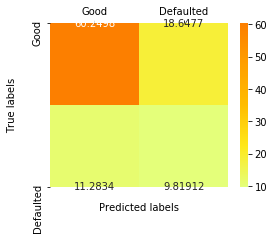

---------------------------------------

THRESHOLD: 0.8 
accuracy: 0.5645994832041343




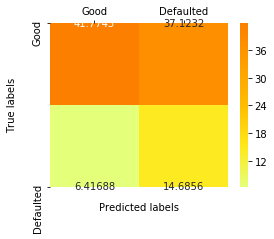

---------------------------------------

THRESHOLD: 0.85 
accuracy: 0.39276485788113696




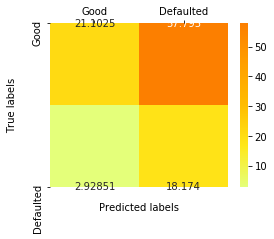

ALL METRICS
                  0         1         2
THRESHOLD      0.75       0.8      0.85
accuracy   0.700689  0.564599  0.392765
recall     0.763646  0.529476  0.267467
tnr        0.465306  0.695918  0.861224
fpr        0.534694  0.304082  0.138776
precision  0.842264  0.866845  0.878136
f1_score   0.801031  0.657404  0.410042


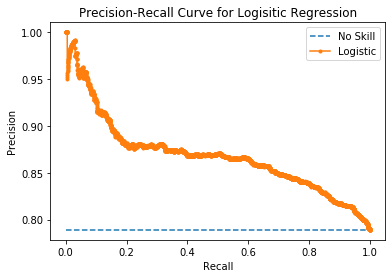

Area under curve is 0.868


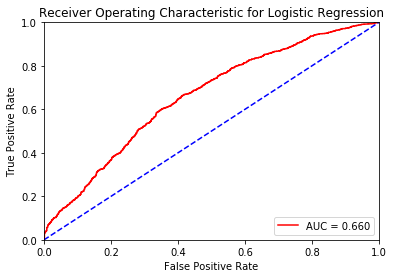

In [ ]:
THRESHOLD = [.75, .80, .85]
results = pd.DataFrame(columns=["THRESHOLD", "accuracy", "recall", "tnr", "fpr", "precision", "f1_score"]) # df to store results
results['THRESHOLD'] = THRESHOLD                                                                           # threshold column
             
j = 0                                                                                                      
for i in THRESHOLD:                                                                                        # iterate over each threshold    
    
    
    lgstc_reg.fit(X_train, y_train)                                                                        # fit data to model
    preds = np.where(lgstc_reg.predict_proba(X_test)[:,1] > i, 1, 0)                                       # if prob > threshold, predict 1
    
    cm = (confusion_matrix(y_test, preds,labels=[1, 0], sample_weight=None) / len(y_test) )*100                   # confusion matrix (in percentage)
    TP = cm[0][0]                                                                                          # True Positives
    FN = cm[0][1]                                                                                          # False Positives
    FP = cm[1][0]                                                                                          # True Negatives
    TN = cm[1][1]                                                                                          # False Negatives
        
    results.iloc[j,1] = accuracy_score(y_test, preds) 
    results.iloc[j,2] = recall_score(y_test, preds)
    results.iloc[j,3] = TN/(FP+TN)                                                                         # True negative rate
    results.iloc[j,4] = FP/(FP+TN)                                                                         # False positive rate
    results.iloc[j,5] = precision_score(y_test, preds)
    results.iloc[j,6] = f1_score(y_test, preds)
    
    print( '---------------------------------------\n' )
    print('THRESHOLD:', i, '\naccuracy:', results.iloc[j,1])
    print( '\n' )
    
    plt.figure(figsize=(4, 3))      # format the plot size
    ax = plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax, fmt='g', cmap="Wistia")
    ax.set_xlabel('\nPredicted labels'); ax.set_ylabel('True labels\n')
    ax.xaxis.tick_top()
    ax.yaxis.set_ticklabels(['Good', 'Defaulted'])
    ax.xaxis.set_ticklabels(['Good', 'Defaulted'])
    plt.show()

    j += 1
  
print( 'ALL METRICS' )
print( results.T )

lr_probs = lgstc_reg.predict_proba(X_test)[:,1]
lr_precision, lr_recall, _=precision_recall_curve(y_test,lr_probs)
lr_auc = auc(lr_recall, lr_precision)

no_skill = len(y_test[y_test==1])/len(y_test)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
plt.plot(lr_recall, lr_precision, marker='.', label='Logistic')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Logisitic Regression')
# show the legend
plt.legend()
# show the plot
plt.show()
print('Area under curve is', '%.3f'%lr_auc)

#ROC curve
fpr, tpr, threshold = roc_curve(y_test, lr_probs)
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic for Logistic Regression')
plt.plot(fpr,tpr,'r', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'b--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

##Decision Trees##
This section explores the two criteria, Gini and Entropy, with decision trees and the depth of trees

### Gini criterion###

In [ ]:
#use gini criteria. If all leaves are pure, the max depth is 35. Summarize the accuracy score with tree-depth from 1 to 35.
Summary = pd.DataFrame(columns=['Depth','Accuracy'])
for i in range(1,36):
  GiniTree = dt(criterion='gini', max_depth=i)
  GiniTree.fit(X_train, y_train)
  y_pred=GiniTree.predict(X_test)
  Summary = Summary.append({'Depth':i, 'Accuracy': accuracy_score(y_pred,y_test)},ignore_index=True) 
Summary

,Depth,Accuracy
0,1.0,0.788975
1,2.0,0.788975
2,3.0,0.789406
3,4.0,0.786822
4,5.0,0.788544
5,6.0,0.781654
6,7.0,0.781438
7,8.0,0.774763
8,9.0,0.770241
9,10.0,0.761413


Fitted a pure leaf decision tree with gini of 1568 leaves and is of depth 35
Accuracy is 0.6739879414298019
---------------------------------------

THRESHOLD: 0.75 
accuracy: 0.6718346253229974




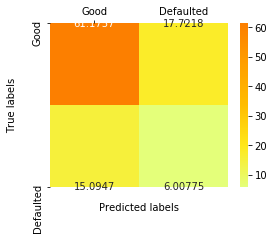

---------------------------------------

THRESHOLD: 0.8 
accuracy: 0.6731266149870802




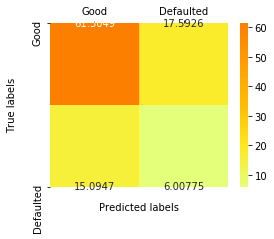

---------------------------------------

THRESHOLD: 0.85 
accuracy: 0.669681309216193




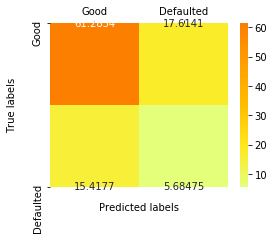

ALL METRICS
                  0         1         2
THRESHOLD      0.75       0.8      0.85
accuracy   0.671835  0.673127  0.669681
recall     0.775382   0.77702  0.776747
tnr        0.284694  0.284694  0.269388
fpr        0.715306  0.715306  0.730612
precision  0.802089  0.802424  0.798989
f1_score    0.78851  0.789517  0.787711


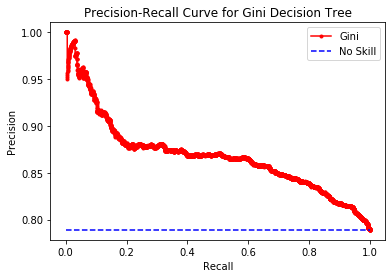

Area under curve is 0.876


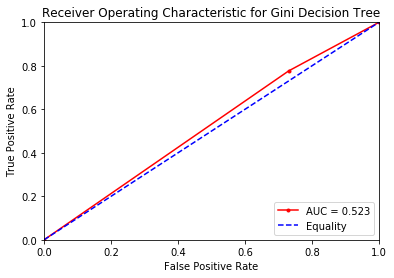

In [ ]:
#use 35 depth tree, test the precision and sesitivity of the tree with threshold .75,.8,.85
GiniPureLeafTree = dt(criterion='gini', max_depth=None)
GiniPureLeafTree.fit(X_train, y_train)
print('Fitted a pure leaf decision tree with gini of', GiniPureLeafTree.get_n_leaves(), 'leaves and is of depth',GiniPureLeafTree.get_depth())
y_pred=GiniPureLeafTree.predict(X_test)
print("Accuracy is", accuracy_score(y_pred, y_test))

THRESHOLD = [.75, .80, .85]
results = pd.DataFrame(columns=["THRESHOLD", "accuracy", "recall", "tnr", "fpr", "precision", "f1_score"]) # df to store results
results['THRESHOLD'] = THRESHOLD                                                                           # threshold column
             
j = 0                                                                                                      
for i in THRESHOLD:                                                                                        # iterate over each threshold    
    
    
    GiniPureLeafTree.fit(X_train, y_train)                                                                        # fit data to model
    preds = np.where(GiniPureLeafTree.predict_proba(X_test)[:,1] > i, 1, 0)                                       # if prob > threshold, predict 1
    
    cm = (confusion_matrix(y_test, preds,labels=[1, 0], sample_weight=None) / len(y_test) )*100                   # confusion matrix (in percentage)
    TP = cm[0][0]                                                                                          # True Positives
    FN = cm[0][1]                                                                                          # False Positives
    FP = cm[1][0]                                                                                          # True Negatives
    TN = cm[1][1]                                                                                          # False Negatives
        
    results.iloc[j,1] = accuracy_score(y_test, preds) 
    results.iloc[j,2] = recall_score(y_test, preds)
    results.iloc[j,3] = TN/(FP+TN)                                                                         # True negative rate
    results.iloc[j,4] = FP/(FP+TN)                                                                         # False positive rate
    results.iloc[j,5] = precision_score(y_test, preds)
    results.iloc[j,6] = f1_score(y_test, preds)
    
    print( '---------------------------------------\n' )
    print('THRESHOLD:', i, '\naccuracy:', results.iloc[j,1])
    print( '\n' )
    
    plt.figure(figsize=(4, 3))      # format the plot size
    ax = plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax, fmt='g', cmap="Wistia")
    ax.set_xlabel('\nPredicted labels'); ax.set_ylabel('True labels\n')
    ax.xaxis.tick_top()
    ax.yaxis.set_ticklabels(['Good', 'Defaulted'])
    ax.xaxis.set_ticklabels(['Good', 'Defaulted'])
    plt.show()

    j += 1
print( 'ALL METRICS' )
print( results.T )

#plot Precision-recall curve
dt_gini_probs = GiniPureLeafTree.predict_proba(X_test)[:,1]
dt_gini_precision, dt_gini_recall, _=precision_recall_curve(y_test,dt_gini_probs)
dt_gini_auc = auc(dt_gini_recall, dt_gini_precision)

no_skill = len(y_test[y_test==1])/len(y_test)

plt.plot(lr_recall, lr_precision, 'r',marker='.', label='Gini')
plt.plot([0, 1], [no_skill, no_skill], 'b--', label='No Skill')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.title("Precision-Recall Curve for Gini Decision Tree")

plt.show()
print('Area under curve is', '%.3f'%dt_gini_auc)

#plot ROC curve
fpr, tpr, threshold = roc_curve(y_test, dt_gini_probs)
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic for Gini Decision Tree')
plt.plot(fpr,tpr,'r', marker='.',label = 'AUC = %0.3f' % roc_auc)

plt.plot([0, 1], [0, 1],'b--',label='Equality')
plt.legend(loc = 'lower right')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


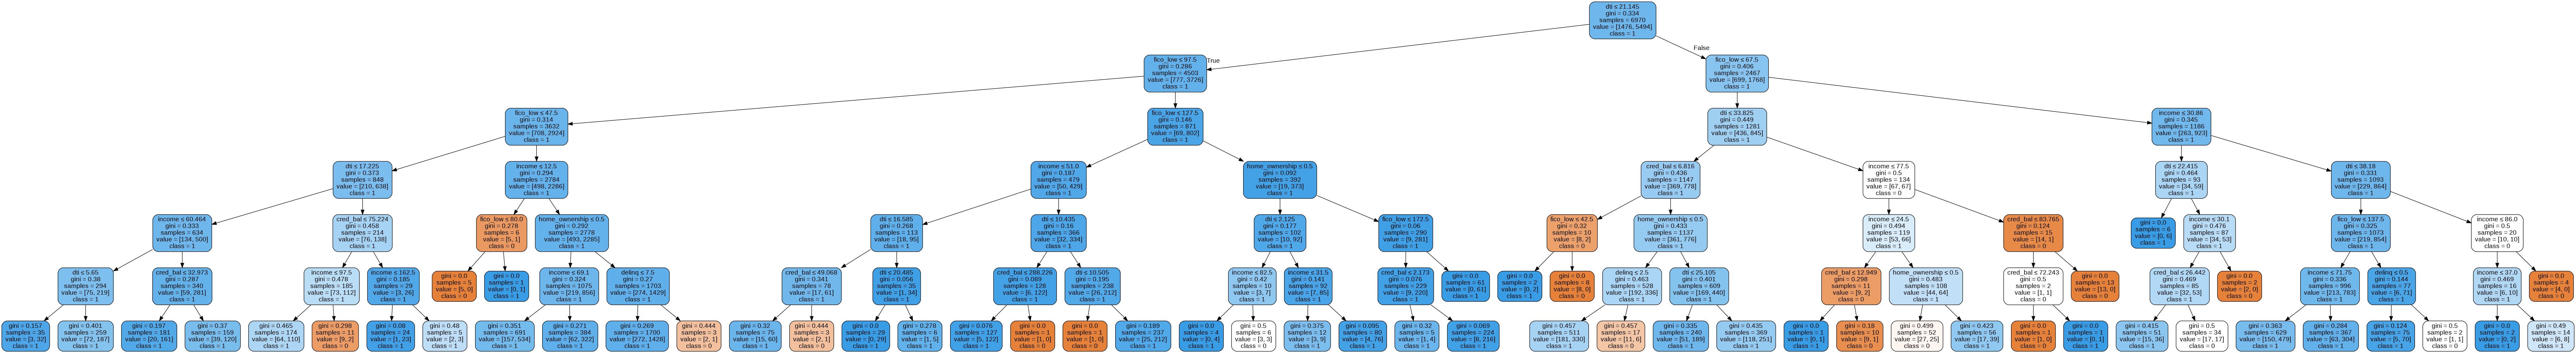

In [ ]:
#Plot 6-depth tree as an illuatrative example
import IPython as ip
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
GiniTreeTest = dt(criterion="gini", max_depth=6).fit(X_train,y_train)
dot_data = StringIO()
export_graphviz(GiniTreeTest, out_file=dot_data,  
                filled=True, rounded=True, class_names = ['0','1'],
                special_characters=True, feature_names = ['home_ownership', 'income', 'dti', 'delinq', 'fico_low', 'cred_bal'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('Lending Club Gini.png')
Image(graph.create_png())



###Entropy Criteria###

# New Section

In [ ]:
#use entropy criteria. If all leaves are pure, the max depth is 49. Summarize the accuracy score with tree-depth from 1 to 49.
Summary = pd.DataFrame(columns=['Depth','Accuracy'])
for i in range(1,50):
  EntropyTree = dt(criterion='entropy', max_depth=i)
  EntropyTree.fit(X_train, y_train)
  y_pred=EntropyTree.predict(X_test)
  Summary = Summary.append({'Depth':i, 'Accuracy': accuracy_score(y_pred,y_test)},ignore_index=True) 
Summary

,Depth,Accuracy
0,1.0,0.788975
1,2.0,0.788975
2,3.0,0.789406
3,4.0,0.788975
4,5.0,0.787252
5,6.0,0.782946
6,7.0,0.783592
7,8.0,0.774332
8,9.0,0.774548
9,10.0,0.763997


Fitted a pure leaf decision tree with entropy of 1532 leaves and is of depth 48
Accuracy is 0.6795865633074936
---------------------------------------

THRESHOLD: 0.75 
accuracy: 0.6808785529715762




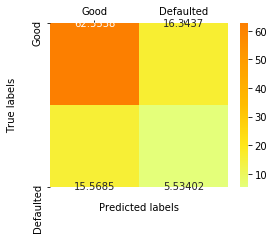

---------------------------------------

THRESHOLD: 0.8 
accuracy: 0.6808785529715762




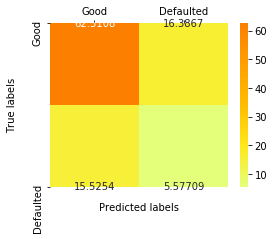

---------------------------------------

THRESHOLD: 0.85 
accuracy: 0.6767872523686477




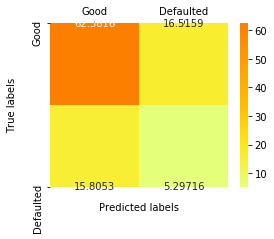

ALL METRICS
                  0         1         2
THRESHOLD      0.75       0.8      0.85
accuracy   0.680879  0.680879  0.676787
recall     0.792849  0.792303  0.790666
tnr        0.262245  0.264286   0.25102
fpr        0.737755  0.735714   0.74898
precision  0.800717  0.801049  0.797852
f1_score   0.796764  0.796652  0.794243


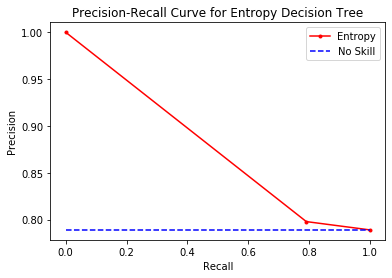

Area under curve is 0.877


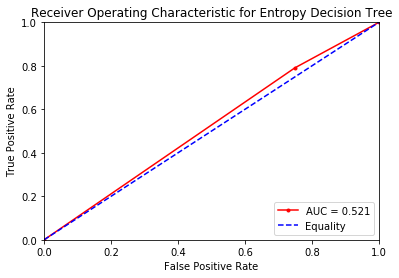

In [ ]:
#use 49 depth tree, test the precision and sesitivity of the tree with threshold .75,.8,.85
EntropyPureLeafTree = dt(criterion='entropy', max_depth=None)
EntropyPureLeafTree.fit(X_train, y_train)
print('Fitted a pure leaf decision tree with entropy of', EntropyPureLeafTree.get_n_leaves(), 'leaves and is of depth',EntropyPureLeafTree.get_depth())
y_pred=EntropyPureLeafTree.predict(X_test)
print("Accuracy is", accuracy_score(y_pred, y_test))

THRESHOLD = [.75, .80, .85]
results = pd.DataFrame(columns=["THRESHOLD", "accuracy", "recall", "tnr", "fpr", "precision", "f1_score"]) # df to store results
results['THRESHOLD'] = THRESHOLD                                                                           # threshold column
             
j = 0                                                                                                      
for i in THRESHOLD:                                                                                        # iterate over each threshold    
    
    
    EntropyPureLeafTree.fit(X_train, y_train)                                                                        # fit data to model
    preds = np.where(EntropyPureLeafTree.predict_proba(X_test)[:,1] > i, 1, 0)                                       # if prob > threshold, predict 1
    
    cm = (confusion_matrix(y_test, preds,labels=[1, 0], sample_weight=None) / 4644 )*100                   # confusion matrix (in percentage)
    TP = cm[0][0]                                                                                          # True Positives
    FN = cm[0][1]                                                                                          # False Positives
    FP = cm[1][0]                                                                                          # True Negatives
    TN = cm[1][1]                                                                                          # False Negatives
        
    results.iloc[j,1] = accuracy_score(y_test, preds) 
    results.iloc[j,2] = recall_score(y_test, preds)
    results.iloc[j,3] = TN/(FP+TN)                                                                         # True negative rate
    results.iloc[j,4] = FP/(FP+TN)                                                                         # False positive rate
    results.iloc[j,5] = precision_score(y_test, preds)
    results.iloc[j,6] = f1_score(y_test, preds)
    
    print( '---------------------------------------\n' )
    print('THRESHOLD:', i, '\naccuracy:', results.iloc[j,1])
    print( '\n' )
    
    plt.figure(figsize=(4, 3))      # format the plot size
    ax = plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax, fmt='g', cmap="Wistia")
    ax.set_xlabel('\nPredicted labels'); ax.set_ylabel('True labels\n')
    ax.xaxis.tick_top()
    ax.yaxis.set_ticklabels(['Good', 'Defaulted'])
    ax.xaxis.set_ticklabels(['Good', 'Defaulted'])
    plt.show()

    j += 1

print( 'ALL METRICS' )
print( results.T )

#plot Precision-Recall curve
dt_entropy_probs = EntropyPureLeafTree.predict_proba(X_test)[:,1]
dt_entropy_precision, dt_entropy_recall, _=precision_recall_curve(y_test,dt_entropy_probs)
dt_entropy_auc = auc(dt_entropy_recall, dt_entropy_precision)

no_skill = len(y_test[y_test==1])/len(y_test)

plt.plot(dt_entropy_recall, dt_entropy_precision, 'r',marker='.', label='Entropy')
plt.plot([0, 1], [no_skill, no_skill], 'b--', label='No Skill')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.title("Precision-Recall Curve for Entropy Decision Tree")

plt.show()
print('Area under curve is', '%.3f'%dt_entropy_auc)

#plot ROC curve
fpr, tpr, threshold = roc_curve(y_test, dt_entropy_probs)
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic for Entropy Decision Tree')
plt.plot(fpr,tpr,'r', marker='.',label = 'AUC = %0.3f' % roc_auc)
plt.plot([0, 1], [0, 1],'b--',label='Equality')
plt.legend(loc = 'lower right')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

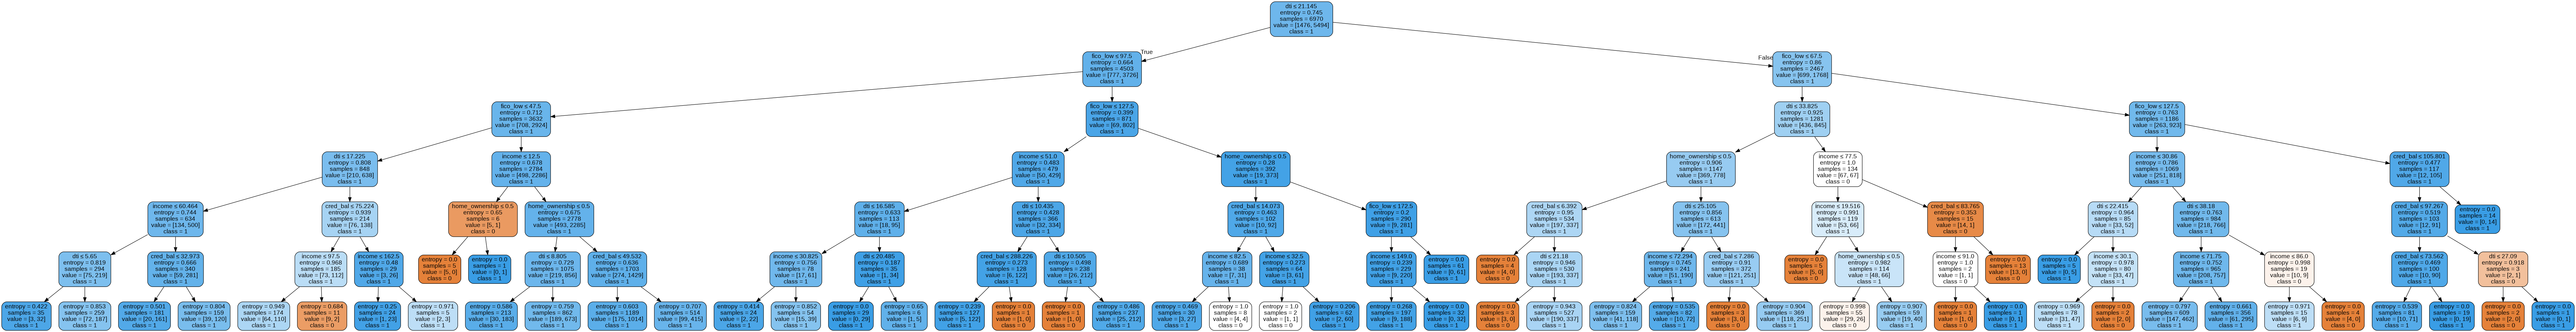

In [ ]:
#Plot 6-depth tree as an illuatrative example
import IPython as ip
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
EntropyTreeTest = dt(criterion="entropy", max_depth=6).fit(X_train,y_train)
dot_data = StringIO()
export_graphviz(EntropyTreeTest, out_file=dot_data,  class_names=['0','1'],
                filled=True, rounded=True,
                special_characters=True, feature_names = ['home_ownership', 'income', 'dti', 'delinq', 'fico_low', 'cred_bal'],)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('Lending Club Entropy.png')
Image(graph.create_png())